In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [5]:
df=pd.read_csv('accident_data.csv')
df.head()

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022


In [6]:
df.shape

(147, 17)

In [7]:
df.info

<bound method DataFrame.info of            Date      Time  Latitude  Longitude Location Description  \
0    05-01-2022  15:30:00   40.7128   -74.0060              Highway   
1    10-02-2022  18:45:00   41.8781   -87.6298               Street   
2    15-03-2022  12:00:00   37.7749  -122.4194         Intersection   
3    20-04-2022  09:20:00   34.0522  -118.2437              Highway   
4    25-05-2022  17:10:00   40.7128   -74.0060               Street   
..          ...       ...       ...        ...                  ...   
142  10-08-2024  12:45:00   40.7128   -74.0060               Street   
143  15-09-2024  08:30:00   37.7749  -122.4194              Highway   
144  20-10-2024  16:20:00   34.0522  -118.2437               Street   
145  25-11-2024  14:10:00   40.7128   -74.0060         Intersection   
146  30-12-2024  10:00:00   41.8781   -87.6298              Highway   

    Weather Conditions Road Conditions Visibility Accident Type  \
0                Foggy             Wet       Poo

In [8]:
df.describe()

,Latitude,Longitude,No of Vehichles,Vehicle Speed,Year
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,38.325525,-98.649265,1.428571,38.843537,2022.979592
std,3.197276,20.962406,0.496564,8.110285,0.823203
min,34.052200,-122.419400,1.000000,25.000000,2022.000000
25%,34.052200,-118.243700,1.000000,30.000000,2022.000000
50%,40.712800,-87.629800,1.000000,35.000000,2023.000000
75%,40.712800,-74.006000,2.000000,45.000000,2024.000000
max,41.878100,-74.006000,2.000000,55.000000,2024.000000


In [9]:
df.isnull().sum()

Date                    0
Time                    0
Latitude                0
Longitude               0
Location Description    0
Weather Conditions      0
Road Conditions         0
Visibility              0
Accident Type           0
Injury Severity         0
Contributing Factors    0
Vehicle Type            0
No of Vehichles         0
Vehicle Speed           0
Day of Week             0
Month                   0
Year                    0
dtype: int64

In [10]:
df.duplicated().sum()

110

In [11]:
df_no_duplicates = df.drop_duplicates()

# drop data and time

In [12]:
df.drop(['Date','Time'], axis=1, inplace=True)

In [16]:
df.head()

,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022


In [13]:
# Display DataFrame after removing duplicates
print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)


DataFrame after removing duplicates:
          Date      Time  Latitude  Longitude Location Description  \
0   05-01-2022  15:30:00   40.7128   -74.0060              Highway   
1   10-02-2022  18:45:00   41.8781   -87.6298               Street   
2   15-03-2022  12:00:00   37.7749  -122.4194         Intersection   
3   20-04-2022  09:20:00   34.0522  -118.2437              Highway   
4   25-05-2022  17:10:00   40.7128   -74.0060               Street   
5   30-06-2022  14:30:00   41.8781   -87.6298         Intersection   
6   05-07-2022  20:15:00   34.0522  -118.2437               Street   
7   10-08-2022  12:45:00   40.7128   -74.0060              Highway   
8   15-09-2022  08:30:00   37.7749  -122.4194         Intersection   
9   20-10-2022  16:20:00   34.0522  -118.2437              Highway   
10  25-11-2022  14:10:00   40.7128   -74.0060               Street   
11  30-12-2022  10:00:00   41.8781   -87.6298         Intersection   
12  05-01-2023  15:30:00   34.0522  -118.2437       

In [14]:
df.duplicated().sum()

110

# label encoder

In [21]:
from sklearn import preprocessing

In [22]:
lb= preprocessing.LabelEncoder()

In [23]:
df['Location Description']=lb.fit_transform(df['Location Description'])

In [25]:
df['Weather Conditions']=lb.fit_transform(df['Weather Conditions'])

In [26]:
df['Road Conditions']=lb.fit_transform(df['Road Conditions'])

In [27]:
df['Visibility']=lb.fit_transform(df['Visibility'])

In [28]:
df['Accident Type']=lb.fit_transform(df['Accident Type'])

In [38]:
df['Injury Severity']=lb.fit_transform(df['Injury Severity'])

In [39]:
df['Contributing Factors']=lb.fit_transform(df['Contributing Factors'])

In [43]:
df['Vehicle Type']=lb.fit_transform(df['Vehicle Type'])

In [44]:
df['Day of Week']=lb.fit_transform(df['Day of Week'])

In [45]:
df['Month']=lb.fit_transform(df['Month'])

In [46]:
df.head()

,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year,Injuy Severity
0,40.7128,-74.0060,0,1,1,1,0,1,3,2,1,45,3,4,2022,1
1,41.8781,-87.6298,2,2,1,1,1,2,1,1,1,40,1,3,2022,2
2,37.7749,-122.4194,1,0,0,0,0,1,4,0,2,25,2,7,2022,1
3,34.0522,-118.2437,0,0,0,0,0,0,2,0,2,35,3,0,2022,0
4,40.7128,-74.0060,2,2,1,1,0,2,3,0,1,50,3,8,2022,2


# correlation

<Axes: >

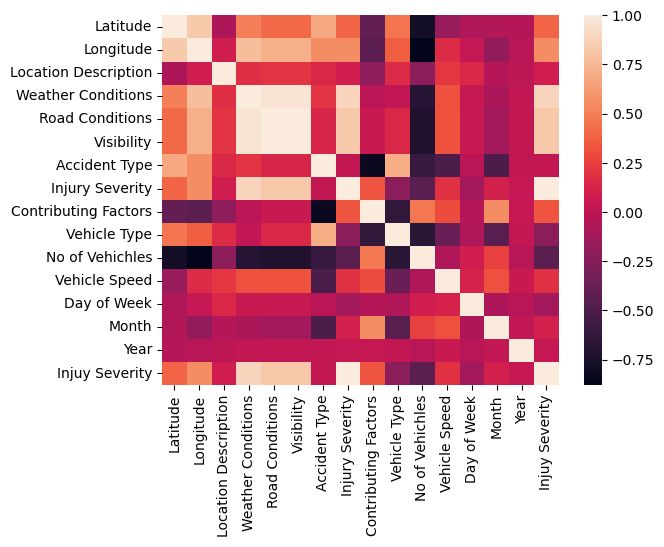

In [47]:
sns.heatmap(df.corr())

# outliers

<Axes: >

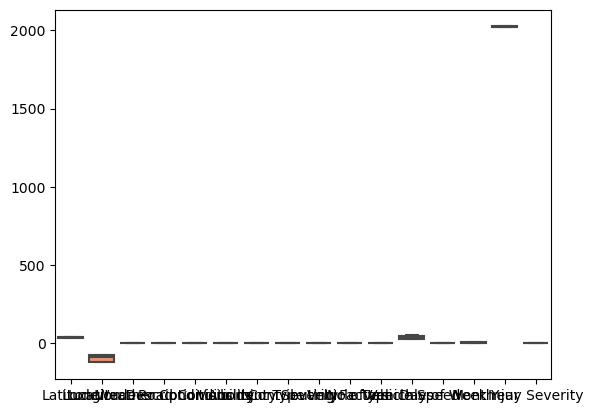

In [48]:
sns.boxplot(df)

# visualization 

<Axes: xlabel='Weather Conditions'>

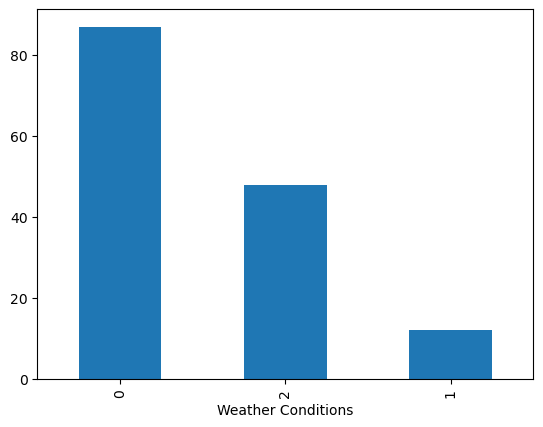

In [50]:
df['Weather Conditions'].value_counts().plot(kind='bar')

<Axes: xlabel='Visibility'>

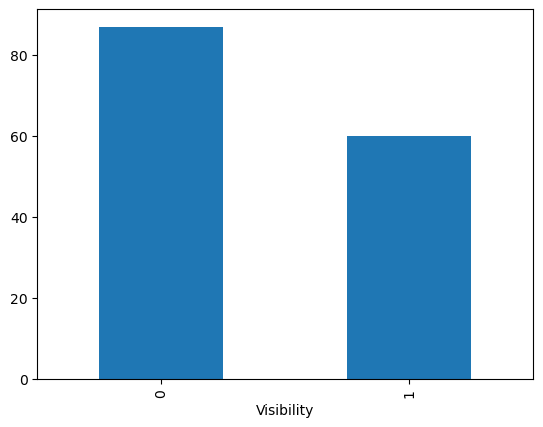

In [56]:
df['Visibility'].value_counts().plot(kind='bar')

<Axes: xlabel='Vehicle Speed'>

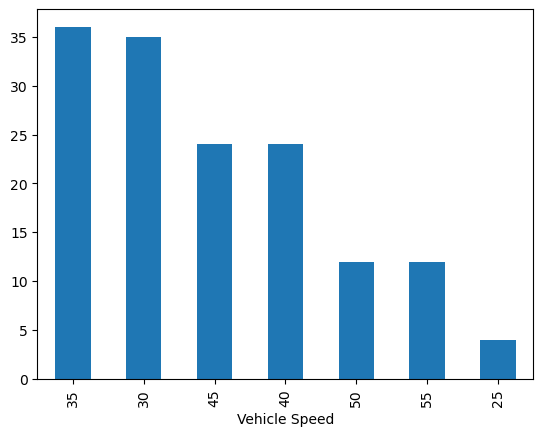

In [63]:
df['Vehicle Speed'].value_counts().plot(kind='bar')

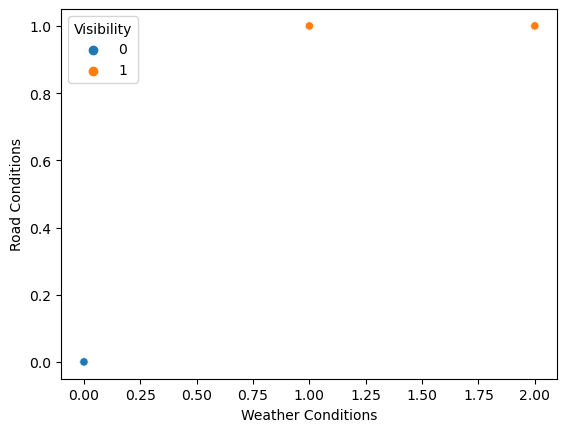

In [64]:
sns.scatterplot(x='Weather Conditions', y='Road Conditions', hue='Visibility', data=df)
plt.show()

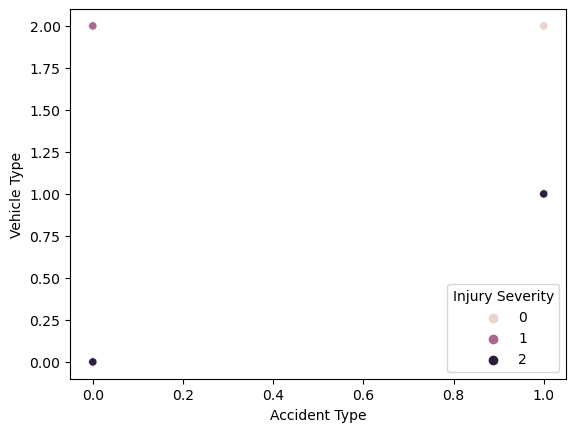

In [65]:
sns.scatterplot(x='Accident Type', y='Vehicle Type', hue='Injury Severity', data=df)
plt.show()

C:\Users\bossh\AppData\Local\Temp\ipykernel_16728\416706689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Contributing Factors'])
C:\Users\bossh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Contributing Factors', ylabel='Density'>

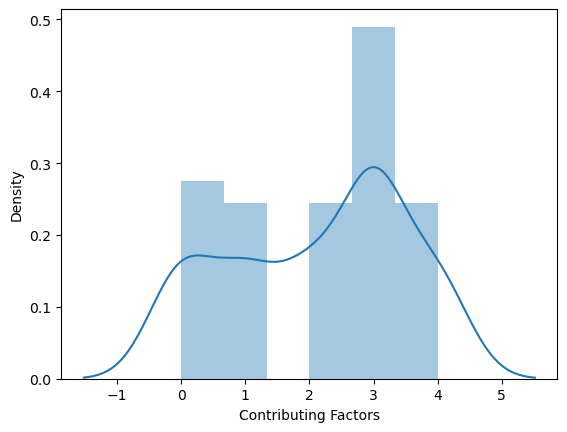

In [62]:
sns.distplot(df['Contributing Factors'])

(array([51.,  0.,  0., 48.,  0.,  0., 48.]),
 array([2022.        , 2022.28571429, 2022.57142857, 2022.85714286,
        2023.14285714, 2023.42857143, 2023.71428571, 2024.        ]),
 <BarContainer object of 7 artists>)

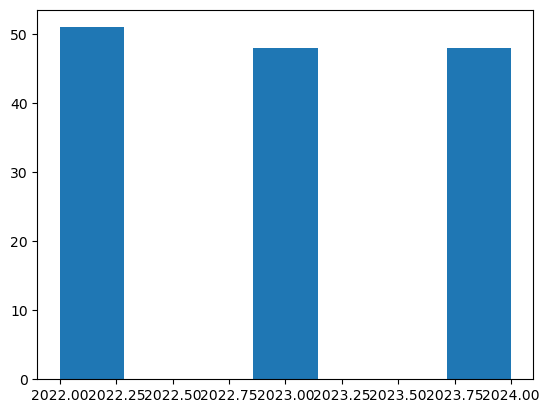

In [68]:
plt.hist(df['Year'],bins=7)

(array([36., 27., 24., 24., 36.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. ]),
 <BarContainer object of 5 artists>)

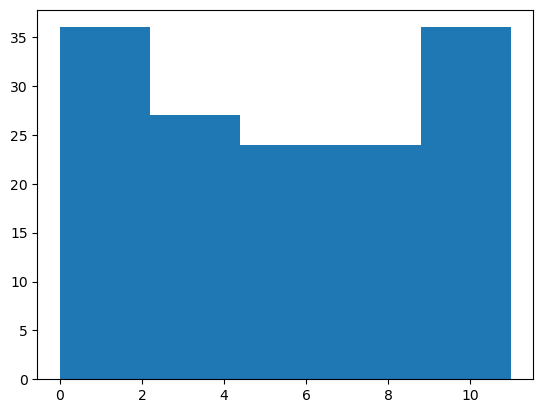

In [78]:
plt.hist(df['Month'],bins=5)

C:\Users\bossh\AppData\Local\Temp\ipykernel_16728\91804897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Accident Type']==0]['Road Conditions'],hist=False)
C:\Users\bossh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bossh\AppData\Local\Temp\ipykernel_16728\91804897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

<Axes: xlabel='Road Conditions', ylabel='Density'>

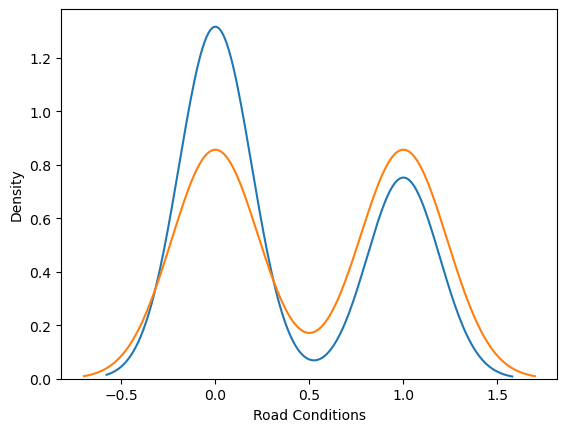

In [81]:
sns.distplot(df[df['Accident Type']==0]['Road Conditions'],hist=False)
sns.distplot(df[df['Accident Type']==1]['Road Conditions'],hist=False)

C:\Users\bossh\AppData\Local\Temp\ipykernel_16728\3093851119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Accident Type']==0]['Weather Conditions'],hist=False)
C:\Users\bossh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bossh\AppData\Local\Temp\ipykernel_16728\3093851119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `di

<Axes: xlabel='Weather Conditions', ylabel='Density'>

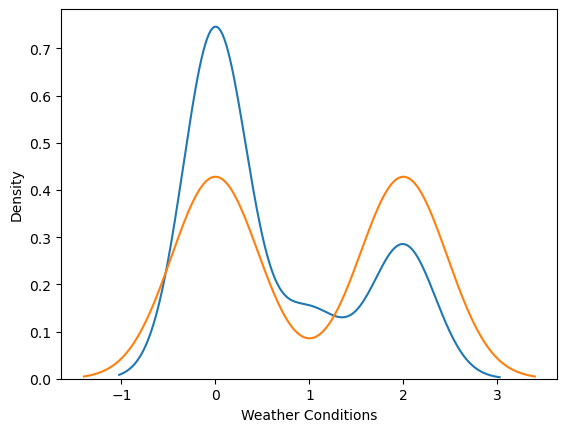

In [80]:
sns.distplot(df[df['Accident Type']==0]['Weather Conditions'],hist=False)
sns.distplot(df[df['Accident Type']==1]['Weather Conditions'],hist=False)